# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

- **LabelMe**: A graphical image annotation tool that allows researchers to label Images for various computer vision tasks, such as object detection and segmentation. It's particularly useful for creating datasets needed for training machine learning models.

- **TensorFlow**: Google's open-source framework designed for high-performance numerical computation. It's widely used for machine learning and deep learning applications, offering extensive libraries and community support for developing and training models.

- **TensorFlow-GPU**: A version of TensorFlow that leverages the Graphics Processing Unit (GPU) for computation. It accelerates the training and inference processes for deep learning models by utilizing the parallel processing power of GPUs.

- **OpenCV-Python**: A Python wrapper for OpenCV, offering access to over 2500 optimized algorithms for image and video analysis. It's used for tasks like facial recognition, object detection, and motion analysis.

- **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It's a fundamental tool for data analysis and scientific computing, allowing users to plot a wide variety of graphs and charts.

- **Albumentations**: A fast and flexible image augmentation library designed to assist in the preprocessing of Images for deep learning models. It supports a wide range of augmentation techniques, helping improve model generalization.

In [1]:
# Depedencies installation (Python 3.6 - 3.9 is required )
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/mn/8kzb8nld6yz1x00ppzbkn5x40000gn/T/pip-install-ozp9fwyc/tensorflow-gpu_866f1ae794894a26a90368ac2fbc8b30/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subp

### 1.2 Collect Images Using OpenCV

In [2]:
import os
import time
import uuid
import cv2 

- `os`: A module that provides functions to interact with the operating system, including file and directory management.
- `time`: Allows access to time-related functions, such as waiting for a period (sleeping) or retrieving the current time.
- `uuid`: Used for generating unique identifiers (UUIDs) for objects, useful in applications requiring unique IDs.
- `cv2`: The OpenCV library for Python, used for computer vision tasks, including reading, displaying, and processing Images and videos.

In [ ]:
# Path to the folder containing Images
BANK_PATH = 'Data/Bank'

# Path to the folder containing Images with unique names 
IMAGES_PATH = 'Data/Images'


# Collect .jpg files in the specified folder
image_files = [
    os.path.join(BANK_PATH, f) 
    for f in os.listdir(BANK_PATH) 
    if f.endswith('.jpg') or  f.endswith('jpeg')
]

# Process each image
for imgnum, img_file in enumerate(image_files):
    print(f'Processing image {imgnum}: {img_file}')
    
    # Read the image
    frame = cv2.imread(img_file)
    
    # Generate a unique name for the processed image
    imgname = os.path.join(IMAGES_PATH, f'{uuid.uuid1()}.jpg')
    
    # Save the image with the new name
    cv2.imwrite(imgname, frame)
    
    # Display the image
    cv2.imshow('frame', frame)
    time.sleep(0.5)  # Pause for 0.5 seconds between Images

    # Break the loop with the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources and close windows
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

I used LabelMe to annote the faces of the different images that we had

In [2]:
!labelme

2024-02-09 16:15:35,185 [INFO   ] __init__:get_config:67- Loading config file from: /Users/cedrickamdem/.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [5]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

- **TensorFlow (tf)**: An open-source machine learning library developed by Google, widely used for building and training neural networks. TensorFlow supports both CPUs and GPUs and is used for a wide range of tasks such as image and speech recognition.

- **json**: A lightweight data interchange format, this library in Python is used for parsing JSON data to a Python object and converting Python objects back to JSON strings.

- **numpy (np)**: A fundamental package for scientific computing in Python, offering support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **matplotlib (pyplot as plt)**: A plotting library for the Python programming language and its numerical mathematics extension, NumPy. It provides an object-oriented API for embedding plots into applications.

### 2.2 Load Image into TF Data Pipeline 

In [ ]:
def load_image(file_path: tf.Tensor) -> tf.Tensor:
    """
    Reads an image from a file, decodes it into a tensor, and returns the tensor.

    Parameters:
    - file_path: A tf.Tensor containing the file path to an image.

    Returns:
    - A tensor representing the decoded image.
    """
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    return img

# Creating a dataset of file paths from the specified directory, shuffling them.
Images = tf.data.Dataset.list_files('Data/Images/*.jpg', shuffle=False)

# Applying the load_image function to each item in the dataset.
Images = Images.map(load_image)

In [6]:
# Assuming 'Images' is a TensorFlow dataset of Images.
image_generator = Images.batch(4).as_numpy_iterator()

In [7]:
# To upload the 4 Images that we are displaying 

try:
    plot_images = image_generator.next()
except StopIteration:
    print("No more Images to display.")
    # Handle the case where the iterator is exhausted, if necessary.



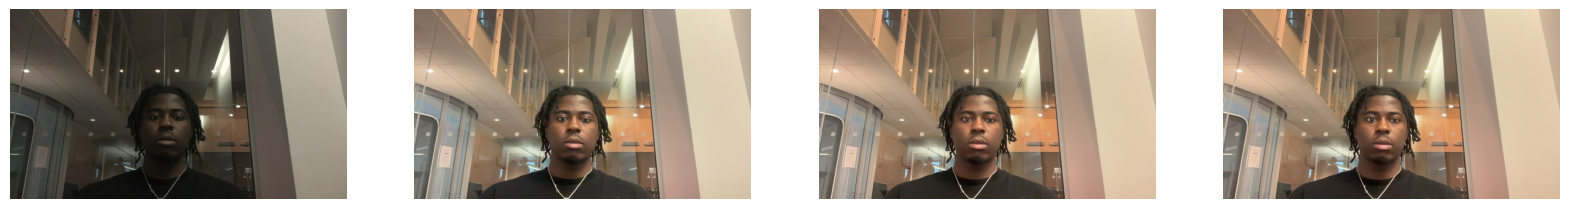

In [8]:
# Create a figure with subplots.
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))  # Ensure ncols matches the batch size.

# Display each image in the batch.
for idx, image in enumerate(plot_images):
    if idx < 4:  # This check ensures we don't go out of bounds for the ax array.
        ax[idx].imshow(image)
        ax[idx].axis('off')  # Optionally, turn off the axis.
    else:
        break  # If there are more Images than subplots, stop the loop.

plt.show()  # Display the plot.

# 3. Partition Raw Data

### Import dependencies 



In [4]:
import shutil
from pathlib import Path


The `shutil` module in Python is a utility module that offers a number of high-level operations on files and collections of files. This module comes in handy for file copying, moving, renaming, and deletion. It is especially useful for tasks involving file manipulation, such as copying entire directories, finding files on the file system that match a certain pattern, and archiving files.

`pathlib` is a module that provides an object-oriented interface for working with file system paths. Introduced in Python 3.4, it aims to replace older modules like `os.path` by providing a more intuitive and convenient way to handle file system paths. The `Path` class is the central class of the module and represents file system paths with semantics appropriate for different operating systems. Using `Path`, you can perform most of the common path manipulations through methods and properties, making your code more readable and expressive.

### 3.2 Automaticaly  split data into training, testing and validation data 

In [10]:
def move_n_jpg_files(source_dir, target_dir, n):
    """
    Moves a specified number of JPG files from a source directory to a target directory.

    Parameters:
    - source_dir (str): The path to the source directory containing the Images to move.
    - target_dir (str): The path to the target directory where Images will be moved.
    - n (int): The number of JPG files to move.
    """
    # Ensure the target directory exists, if not, create it.
    Path(target_dir).mkdir(parents=True, exist_ok=True)
    
    # Get a list of all JPG files in the source directory.
    jpg_files = [f for f in os.listdir(source_dir) if f.lower().endswith('.jpg')]
    
    # Limit the number of files to move to 'n'.
    jpg_files_to_move = jpg_files[:n]
    
    # Move each selected JPG file to the target directory.
    for file in jpg_files_to_move:
        source_path = os.path.join(source_dir, file)
        target_path = os.path.join(target_dir, file)
        shutil.move(source_path, target_path)
        print(f"Moved: {file}")



In [17]:
## Automatically allocate  Images to training data 
move_n_jpg_files('Data/Images', 'Data/Training/Images', 50)

## Automatically allocate  Images to testing data 
move_n_jpg_files('Data/Images', 'Data/Testing/Images', 18)

## Automatically allocate  Images to validation data 
move_n_jpg_files('Data/Images', 'Data/Validation/Images',12 )


### 3.2 Move the Matching Labels

In [18]:

def create_directory_if_not_exists(directory_path):
    """
    Ensures the specified directory exists by creating it if it does not already exist.
    
    Parameters:
    - directory_path (str): The path to the directory to check or create.
    """
    os.makedirs(directory_path, exist_ok=True)

def move_label_files_and_log(source_root, log_file_path):
    """
    Moves JSON label files from a 'Labels' directory to their respective 
    'Training', 'Testing', or 'Validation' directories, and logs these actions.
    
    Parameters:
    - source_root (str): The root directory where 'Data', 'Training', 'Testing', 
      and 'Validation' directories are located.
    - log_file_path (str): The path to the log file where actions are recorded.
    """
    create_directory_if_not_exists(os.path.dirname(log_file_path))
    
    with open(log_file_path, 'a') as log_file:
        for folder in ['Training', 'Testing', 'Validation']:
            images_dir = os.path.join(source_root, folder, 'Images')
            
            for file_name in os.listdir(images_dir):
                base_name = os.path.splitext(file_name)[0]
                json_filename = f"{base_name}.json"
                existing_filepath = os.path.join(source_root, 'Labels', json_filename)
                
                if os.path.exists(existing_filepath):
                    new_directory_path = os.path.join(source_root, folder, 'Labels')
                    create_directory_if_not_exists(new_directory_path)
                    
                    new_filepath = os.path.join(new_directory_path, json_filename)
                    os.replace(existing_filepath, new_filepath)
                    log_file.write(f"Moved: {existing_filepath} -> {new_filepath}\n")

# Example usage
source_directory = 'Data'
log_path = os.path.join(source_directory, 'moved_files_log.txt')

move_label_files_and_log(source_directory, log_path)

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline
`albumentations` is a fast and flexible image augmentation library designed for deep learning tasks, particularly in the field of computer vision. It provides a wide array of techniques to transform images in ways that can increase the diversity of your training dataset, which can help improve the generalization capability of your model. Image augmentation techniques include operations like rotations, translations, changes in brightness or contrast, cropping, flipping, and much more. `albumentations` is designed to be efficient and to work seamlessly with deep learning frameworks such as TensorFlow and PyTorch.

In [1]:
import albumentations as alb

In [29]:

augmentor = alb.Compose([
    alb.RandomCrop(width=1900, height=1000),  # Randomly crops Images to 450x450 pixels
    alb.HorizontalFlip(p=0.5),  # Applies horizontal flip with 50% probability
    alb.RandomBrightnessContrast(p=0.2),  # Randomly adjusts brightness and contrast with 20% probability
    alb.RandomGamma(p=0.2),  # Randomly adjusts gamma with 20% probability
    alb.RGBShift(p=0.2),  # Randomly shifts RGB channels with 20% probability
    alb.VerticalFlip(p=0.5)  # Applies vertical flip with 50% probability
], 
bbox_params=alb.BboxParams(
    format='albumentations',  # Specifies the format for bounding box parameters
    label_fields=['class_labels']  # Specifies the fields that contain Labels
))

### 4.2 Extract Coordinates and Rescale to Match Image Resolution

This section of the code demonstrates the process of extracting object coordinates from a labeled dataset and rescaling these coordinates to match the resolution of the corresponding image. It involves reading an image and its associated label file, where the label contains coordinates that mark the location of objects of interest within the image. These coordinates are initially in a format relative to the original image size and thus need to be rescaled to align correctly with the image when it is displayed or processed at a different resolution. This is crucial for applications in computer vision where precise localization of objects within images is necessary, such as in object detection, image annotation, and machine learning model training. The code efficiently handles the reading, extraction, and rescaling steps using libraries like OpenCV for image operations, JSON for label parsing, and NumPy for numerical operations, ensuring the coordinates can be accurately applied to the image regardless of its current resolution.

In [ ]:
# Load an image from the specified path
img_path = os.path.join('Data', 'Training', 'Images', '4ac1d32a-c78e-11ee-9c29-a6e16123cf16.jpg')
img = cv2.imread(img_path)

# Load the corresponding label file for the image
label_path = os.path.join('Data', 'Training', 'Labels', '4ac1d32a-c78e-11ee-9c29-a6e16123cf16.json')
with open(label_path, 'r') as f:
    label = json.load(f)

# Initialize coordinates list
coords = [0, 0, 0, 0]

# Extract coordinates from the label file
coords[0] = label['shapes'][0]['points'][0][0]  # X coordinate of the first point
coords[1] = label['shapes'][0]['points'][0][1]  # Y coordinate of the first point
coords[2] = label['shapes'][0]['points'][1][0]  # X coordinate of the second point
coords[3] = label['shapes'][0]['points'][1][1]  # Y coordinate of the second point

# Normalize coordinates based on image dimensions
coords = list(np.divide(coords, [1980, 1080, 1980, 1080]))


### 4.4 Apply Augmentations and Verify Results

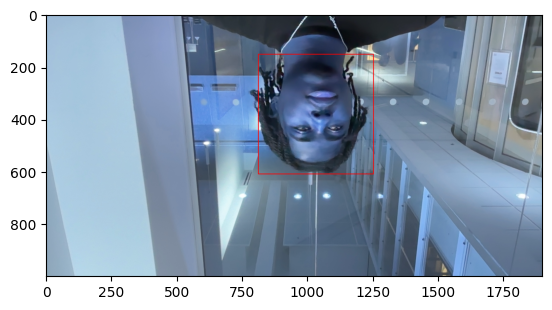

In [39]:
# Apply augmentation to the image with bounding boxes
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

# Draw a rectangle on the augmented image based on the bounding box coordinates
# The coordinates are scaled to match the augmented image size
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [1900,1000]).astype(int)),  # Start coordinate
              tuple(np.multiply(augmented['bboxes'][0][2:], [1900,1000]).astype(int)),   # End coordinate
              (255,0,0),  # Rectangle color (BGR)
              2)  # Rectangle thickness

# Display the augmented image with the rectangle
plt.imshow(augmented['image'])
plt.show()

# 5. Build and Run Augmentation Pipeline

I refer to the process of creating and executing a sequence of operations aimed at generating modified versions of images in a dataset to enhance its diversity and volume. An augmentation pipeline consists of multiple steps, each applying a specific transformation to the images, such as rotating, flipping, scaling, cropping, changing brightness or contrast, and introducing noise. These transformations simulate a variety of scenarios and conditions that the images might encounter in real-world applications, thereby preparing a machine learning model to handle them more effectively.

Building the pipeline involves selecting the transformations that are relevant to the problem domain and configuring them with appropriate parameters to ensure that the augmented images are realistic and useful for training purposes. Running the pipeline processes the original images through this series of transformations, generating new, augmented images.

This step is crucial in machine learning and computer vision projects, especially when dealing with limited datasets. Augmenting data can significantly increase the amount of training data available, helping to improve the model's accuracy and its ability to generalize from the training data to new, unseen data. It also helps prevent overfitting by introducing more variation into the training process, making the model more robust to slight changes in input data.

### 5.1 Run Augmentation Pipeline

In [ ]:
# Function to augment Images and update Labels
def augment_and_update_labels(partition, image_name, augmentor, base_dir='Data', augmentation_dir='Augmentation'):
    # Construct paths for the original image and its label
    image_path = os.path.join(base_dir, partition, 'Images', image_name)
    label_path = os.path.join(base_dir, partition, 'Labels', f'{image_name.split(".")[0]}.json')
    
    # Initialize default coordinates for bounding box
    coords = [0, 0, 0.00001, 0.00001]
    
    # Read the image
    img = cv2.imread(image_path)
    
    # Load label file if it exists and update coordinates
    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            label = json.load(file)
        # Update coordinates based on the label
        coords = [
            label['shapes'][0]['points'][0][0], label['shapes'][0]['points'][0][1],
            label['shapes'][0]['points'][1][0], label['shapes'][0]['points'][1][1]
        ]
        # Normalize coordinates to image dimensions
        coords = list(np.divide(coords, [1980, 1080, 1980, 1080]))

    # Perform augmentation for a predefined number of times
    for x in range(100):
        try:
            augmented_data = augmentor(image=img, bboxes=[coords], class_labels=['face'])
            augmented_image_path = os.path.join(augmentation_dir, partition, 'Images', f'{image_name.split(".")[0]}.{x}.jpg')
            cv2.imwrite(augmented_image_path, augmented_data['image'])
            
            # Prepare annotation for augmented image
            annotation = {'image': image_name}
            if os.path.exists(label_path):
                if len(augmented_data['bboxes']) == 0:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0
                else:
                    annotation['bbox'] = augmented_data['bboxes'][0]
                    annotation['class'] = 1
            else:
                annotation['bbox'] = [0, 0, 0, 0]
                annotation['class'] = 0
            
            # Write new label for augmented image
            augmented_label_path = os.path.join(augmentation_dir, partition, 'Labels', f'{image_name.split(".")[0]}.{x}.json')
            with open(augmented_label_path, 'w') as file:
                json.dump(annotation, file)
                
        except Exception as e:
            print(f'Error processing {image_name}: {e}')

# Main function to iterate over dataset partitions and Images
def main(augmentor):
    partitions = ['Training', 'Testing', 'Validation']
    for partition in partitions:
        Images = os.listdir(os.path.join('Data', partition, 'Images'))
        for image_name in Images:
            augment_and_update_labels(partition, image_name, augmentor)


main(augmentor)

### 5.2 Load Augmented Images to Tensorflow Dataset

The title "### 5.2 Load Augmented Images to Tensorflow Dataset" describes a step in a data preprocessing workflow where augmented images are loaded into a TensorFlow Dataset object for efficient loading and preprocessing. This process facilitates the management and utilization of large datasets in machine learning models, especially when working with deep learning frameworks like TensorFlow.

TensorFlow's Dataset API allows for simple and highly efficient data manipulation. It provides methods for reading, transforming, and batching large datasets in a way that is both memory-efficient and scalable. By converting augmented images into a TensorFlow Dataset, developers can easily apply further transformations, shuffle the data, batch it for training, and prefetch it to improve performance during model training.

This step typically involves the following actions:
- Identifying the directory or directories where the augmented images are stored.
- Using TensorFlow's data loading utilities to read the image files, ensuring that the image data is in the correct format for the model (e.g., resizing images and parsing labels if necessary).
- Optionally applying further on-the-fly data augmentation or preprocessing transformations that can enhance the model's ability to generalize.
- Batching the dataset for optimal training performance and optionally prefetching batches to reduce I/O blocking during training iterations.

Overall, loading augmented images into a TensorFlow Dataset is an essential process in preparing the data pipeline for training deep learning models. It ensures that the augmented data can be efficiently used to train models, leading to better generalization and performance on unseen data.

In [41]:
# Define path to training images
train_image_path = 'Augmentation/Training/Images/*.jpg'

# Create a TensorFlow dataset of file paths
train_images = tf.data.Dataset.list_files(train_image_path, shuffle=False)

# Define a function to load images
def load_and_process_image(file_path):
    # Load the image
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    
    # Resize the image
    img = tf.image.resize(img, (120, 120))
    
    # Normalize the image
    img = img / 255.0
    
    return img

# Apply the load_and_process_image function to each item in the dataset
train_images = train_images.map(load_and_process_image)

In [43]:
# Load test images from the specified directory and prepare them for model input
test_images = tf.data.Dataset.list_files('Augmentation/Testing/Images/*.jpg', shuffle=False)  # Create a dataset of image file paths
test_images = test_images.map(load_image)  # Load each image from its file path
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))  # Resize each image to 120x120 pixels
test_images = test_images.map(lambda x: x / 255)  # Normalize pixel values to [0, 1] by dividing by 255

In [ ]:
# Load validation images from the specified directory and prepare them for model input
val_images = tf.data.Dataset.list_files('Augmentation/Validation/Images/*.jpg', shuffle=False)  # Create a dataset of image file paths
val_images = val_images.map(load_image)  # Load each image from its file path
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))  # Resize each image to 120x120 pixels
val_images = val_images.map(lambda x: x / 255)  # Normalize pixel values to [0, 1] by dividing by 255

# 6. Prepare Labels

### 6.1 Load Labels to Tensorflow Dataset

In [ ]:
def load_labels(label_path):
    """
    Load labels from a JSON file specified by its path.
    
    Args:
    label_path: A TensorFlow tensor representing the path to the JSON file containing label information.
    
    Returns:
    A tuple containing a list of class labels and a list of bounding box coordinates.
    """
    # Open the JSON file for reading, ensuring proper encoding
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)  # Parse the JSON content into a Python dictionary

    # Return the class and bounding box from the label
    return [label['class']], label['bbox']  # Class is returned as a list for consistency with TensorFlow's data handling

# Create TensorFlow datasets for training, testing, and validation labels
# Files are listed, not shuffled, to maintain order for consistent pairing with images
train_labels = tf.data.Dataset.list_files('Augmentation/Training/Labels/*.json', shuffle=False)
# Use tf.py_function to apply the custom load_labels function within the TensorFlow graph
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

# Repeat the process for test labels
test_labels = tf.data.Dataset.list_files('Augmentation/Testing/Labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

# And for validation labels
val_labels = tf.data.Dataset.list_files('Augmentation/Validation/Labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

# 7. Combine Label and Image Samples

### 7.1 Create Final Datasets (Images/Labels)

In [51]:
 # Preparing the Datasets for Training, Testing, and Validation

# Zipping the images and labels together to form a unified dataset for training
Training = tf.data.Dataset.zip((train_images, train_labels))
# Shuffling the training dataset to ensure the model is exposed to various data patterns
Training = Training.shuffle(buffer_size=len(train_images))
# Grouping the training data into batches for efficient training
Training = Training.batch(batch_size=8)
# Prefetching batches to speed up training
Training = Training.prefetch(buffer_size=4)

# Applying the same processing for the testing dataset
Testing = tf.data.Dataset.zip((test_images, test_labels))
Testing = Testing.shuffle(buffer_size=1300)  # Adjust buffer_size to your specific dataset size
Testing = Testing.batch(batch_size=8)
Testing = Testing.prefetch(buffer_size=4)

# And for the validation dataset
Validation = tf.data.Dataset.zip((val_images, val_labels))
Validation = Validation.shuffle(buffer_size=1000)  # Adjust buffer_size to your specific dataset size
Validation = Validation.batch(batch_size=8)
Validation = Validation.prefetch(buffer_size=4)

### 7.2 View Images and Annotations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


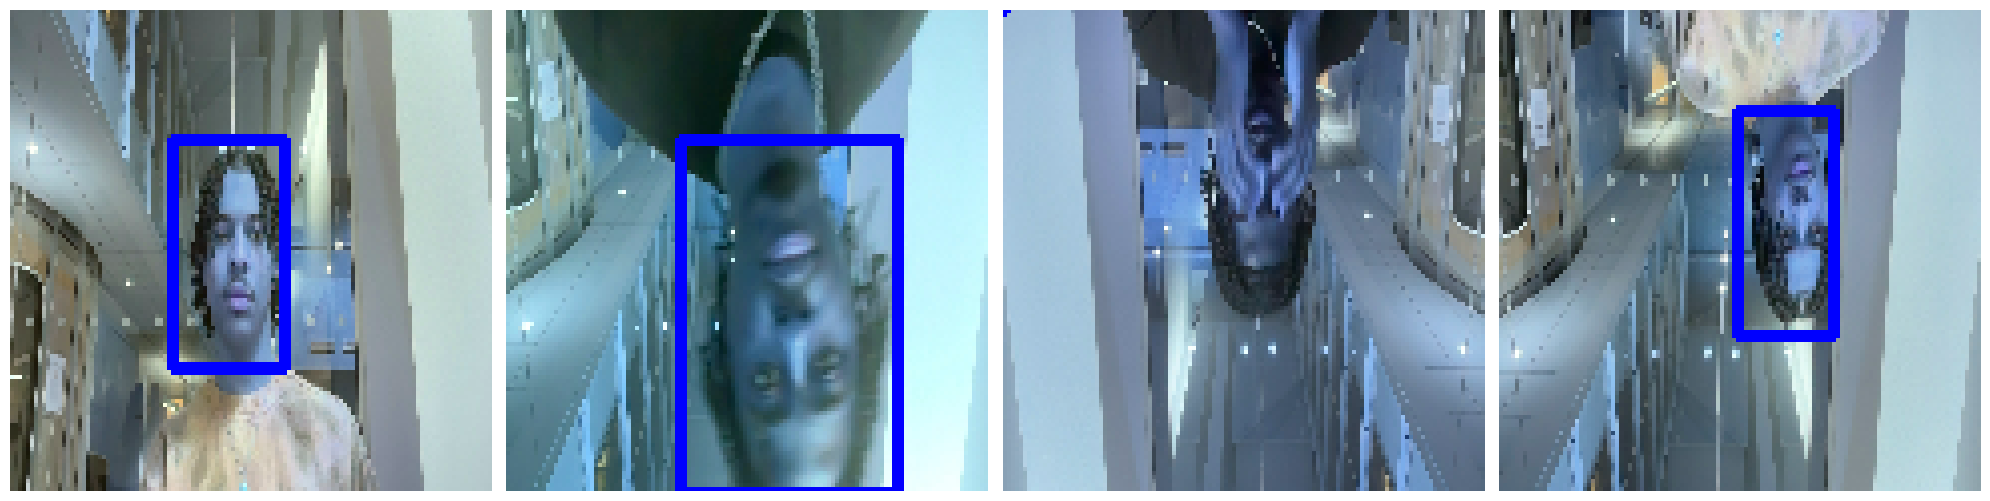

In [56]:
data_samples = Training.as_numpy_iterator()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    # Make a copy of the image to ensure it's writable
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    # Calculate start and end points for the rectangle
    start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))
    
    # Draw the rectangle on the image
    cv2.rectangle(sample_image, start_point, end_point, (255, 0, 0), 2)
    
    # Convert BGR image to RGB for displaying with matplotlib
    sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    ax[idx].imshow(sample_image_rgb)
    ax[idx].axis('off')  # Hide axis

plt.tight_layout()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

Here are descriptions for the TensorFlow Keras classes and functions mentioned:

1. **`from tensorflow.keras.models import Model`**:
   - **Description**: The `Model` class in TensorFlow's Keras API is used to group layers into an object with training and inference features. It is a fundamental class for specifying and training neural networks. Models in Keras are defined by connecting input and output layers.
   - **Common Use Cases**: Creating complex models with multiple inputs and outputs, defining custom neural networks, and encapsulating the entire network in a single object for training, evaluation, and prediction.

2. **`from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D`**:
   - **`Input`**: Defines the input shape of the data allowing the model to know the input dimensionality.
     - **Common Use Cases**: Starting point for a model, specifying the shape of the input data.
   - **`Conv2D`**: A layer that applies a 2D convolution operation to the input. It is particularly useful for processing images in image recognition tasks.
     - **Common Use Cases**: Image and video recognition, image classification, feature extraction in convolutional neural networks (CNNs).
   - **`Dense`**: A regular densely-connected neural network layer. It implements the operation: `output = activation(dot(input, kernel) + bias)`.
     - **Common Use Cases**: Output layers for classification or regression, hidden layers in a deep neural network.
   - **`GlobalMaxPooling2D`**: Applies global max pooling operation for spatial data, reducing the dimensionality of the input by taking the maximum value over the input spatial dimensions.
     - **Common Use Cases**: Reducing the spatial dimensions of a convolutional neural network's output to decrease the number of parameters and computation in the network.

3. **`from tensorflow.keras.applications import VGG16`**:
   - **Description**: `VGG16` is a pre-trained deep learning model for image recognition and classification developed by the Visual Graphics Group at Oxford. It is part of the Keras Applications module, which provides a set of pre-trained models with weights trained on ImageNet.
   - **Common Use Cases**: Image classification, feature extraction, and fine-tuning for custom image classification tasks. The pre-trained `VGG16` model can be used directly for prediction, or it can be adapted to new classification tasks by adding custom layers on top of it.

### 8.2 Create instance of Network

In [12]:
# Download VGG16
vgg = VGG16(include_top=False)

def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.3 Testing The Neural Network

In [61]:
# Initialize the face tracking model using a predefined function
facetracker = build_model()

# Fetch the next batch of training data (images X and their labels y)
X, y = Training.as_numpy_iterator().next()

# Use the model to predict classes and coordinates for the faces in the images
# classes: The predicted categories for each image, indicating the presence of a face
# coords: The coordinates of the bounding boxes around detected faces
classes, coords = facetracker.predict(X)

# 9. Define Losses and Optimizers

### 9.1 Initiliaze Optimizer and LR

In [68]:
# Calculate the number of batches per epoch based on the Training dataset size
batches_per_epoch = len(Training)

# Define learning rate decay over epochs
# The decay formula adjusts the learning rate at each epoch
lr_decay = (1. / 0.75 - 1) / batches_per_epoch

# Initialize the Adam optimizer with a specified learning rate and decay
# The learning rate specifies how much to adjust the model's weights at each step
# The decay controls how the learning rate decreases over time
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Initiliaze Localization Loss and Classification Loss

In [70]:
def localization_loss(y_true, yhat):
    """
    Calculate localization loss for bounding box predictions.
    
    Parameters:
    - y_true: Tensor of true bounding box coordinates and sizes, shape (batch_size, 4).
              Each row contains [x1, y1, x2, y2], the coordinates of the top left
              and bottom right corners.
    - yhat: Tensor of predicted bounding box coordinates and sizes, same shape as y_true.
    
    Returns:
    - Loss value as a Tensor, combining coordinate and size differences.
    """
    # Calculate the sum of squared differences for coordinates (x and y)
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    
    # Calculate height and width for true and predicted bounding boxes
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]
    
    # Calculate the sum of squared differences for sizes (width and height)
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    # Combine coordinate and size losses
    return delta_coord + delta_size

# Define binary crossentropy loss for classification part
classloss = tf.keras.losses.BinaryCrossentropy()

# Define custom loss function for regression/localization part
regressloss = localization_loss

# 10. Training Neural Network

### 10.1 Create Custom Model Class

In [ ]:
class FaceTracker(Model):
    """
    A custom Keras model for face tracking combining classification and localization.

    Attributes:
    - model: The base model used for face detection and tracking.
    - closs: Loss function for classification.
    - lloss: Loss function for localization.
    - opt: Optimizer for training the model.
    """
    
    def __init__(self, eyetracker, **kwargs):
        """
        Initializes the FaceTracker model with an underlying eyetracker model.
        
        Parameters:
        - eyetracker: A pre-trained model for detecting and tracking eyes or faces.
        - kwargs: Additional keyword arguments for the base Model class.
        """
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        """
        Configures the model for training.

        Parameters:
        - opt: Optimizer instance.
        - classloss: Loss function for the classification task.
        - localizationloss: Loss function for the localization task.
        - kwargs: Additional keyword arguments for compilation.
        """
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        """
        Custom training logic.

        Parameters:
        - batch: Tuple containing input data and target data.
        
        Returns:
        A dictionary containing loss values for monitoring.
        """
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            total_loss = batch_localizationloss + 0.5 * batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        """
        Custom evaluation logic.

        Parameters:
        - batch: Tuple containing input data and target data.
        
        Returns:
        A dictionary containing loss values for monitoring.
        """
        X, y = batch
        classes, coords = self.model(X, training=False)
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs):
        """
        Forward pass of the model.

        Parameters:
        - X: Input data.

        Returns:
        The model's predictions.
        """
        return self.model(X, **kwargs)

In [76]:
# Initialize the FaceTracker model with the pre-trained facetracker model.
# The facetracker model should be an instance of a pre-trained neural network
# that is capable of detecting and tracking faces in images.
model = FaceTracker(facetracker)

# Compile the FaceTracker model with the chosen optimizer, classification loss function,
# and regression loss function.
# - opt: An optimizer instance (e.g., Adam optimizer) configured with a specific learning rate and decay.
# - classloss: A binary cross-entropy loss function for the classification task, determining whether
#   a face is present or not in the given input.
# - regressloss: A custom loss function for localization, responsible for accurately identifying
#   the position of the face within the image. This can be implemented as a function calculating
#   the difference between predicted and actual bounding box coordinates of the face.
model.compile(opt, classloss, regressloss)

### 10.2 Training

In [79]:
# Specify the directory where TensorBoard logs will be stored.
logdir = 'logs'

# Initialize the TensorBoard callback, specifying the log directory.
# This callback will log events for TensorBoard, such as metrics and losses during training and validation.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Fit the model to the training dataset.
# - Training: The training dataset prepared for the model, which includes input images and corresponding labels.
# - epochs: The number of times the entire training dataset is passed forward and backward through the neural network.
# - validation_data: The validation dataset used to evaluate the model at the end of each epoch, providing an unbiased evaluation of model performance.
# - callbacks: A list of callbacks to apply during training. In this case, the TensorBoard callback is used for logging.
# The fit method returns a history object containing the loss values and metrics values for each epoch.
hist = model.fit(Training, epochs=10, validation_data=Validation, callbacks=[tensorboard_callback])

# The `hist` object can be used to plot training and validation metrics, analyze the model's performance, and make informed decisions about further model training or adjustments.

Epoch 1/10


2024-02-09 16:57:28.794846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5480 of 75000
2024-02-09 16:57:32.479667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 724s 756ms/step - total_loss: 0.1950 - class_loss: 0.0574 - regress_loss: 0.1663 - val_total_loss: 0.5164 - val_class_loss: 0.0246 - val_regress_loss: 0.5040
Epoch 2/10


2024-02-09 17:09:32.307915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5519 of 75000
2024-02-09 17:09:35.888624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 656s 685ms/step - total_loss: 0.0077 - class_loss: 3.6528e-05 - regress_loss: 0.0077 - val_total_loss: 0.0090 - val_class_loss: 2.3962e-05 - val_regress_loss: 0.0089
Epoch 3/10


2024-02-09 17:20:28.589443: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5570 of 75000
2024-02-09 17:20:32.147025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 650s 678ms/step - total_loss: 0.0050 - class_loss: 1.2878e-05 - regress_loss: 0.0050 - val_total_loss: 0.2272 - val_class_loss: 3.8743e-07 - val_regress_loss: 0.2272
Epoch 4/10


2024-02-09 17:31:18.288284: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5950 of 75000
2024-02-09 17:31:20.874383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 581s 606ms/step - total_loss: 0.0041 - class_loss: 6.4067e-06 - regress_loss: 0.0041 - val_total_loss: 0.0068 - val_class_loss: 9.8348e-07 - val_regress_loss: 0.0068
Epoch 5/10


2024-02-09 17:40:58.982765: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5982 of 75000
2024-02-09 17:41:01.572960: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 604s 631ms/step - total_loss: 0.0038 - class_loss: 4.3423e-06 - regress_loss: 0.0038 - val_total_loss: 0.0021 - val_class_loss: 7.0036e-07 - val_regress_loss: 0.0021
Epoch 6/10


2024-02-09 17:51:03.282826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5434 of 75000
2024-02-09 17:51:06.897657: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 654s 682ms/step - total_loss: 0.0031 - class_loss: 2.8714e-06 - regress_loss: 0.0031 - val_total_loss: 0.0051 - val_class_loss: 4.8880e-05 - val_regress_loss: 0.0051
Epoch 7/10


2024-02-09 18:01:57.100779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5666 of 75000
2024-02-09 18:02:00.175170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 788s 827ms/step - total_loss: 0.0434 - class_loss: 0.0183 - regress_loss: 0.0342 - val_total_loss: 0.0081 - val_class_loss: 4.6939e-06 - val_regress_loss: 0.0081
Epoch 8/10


2024-02-09 18:15:05.587674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5148 of 75000
2024-02-09 18:15:15.585650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 7123 of 75000
2024-02-09 18:15:16.392083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 1141s 1s/step - total_loss: 0.0028 - class_loss: 2.3237e-05 - regress_loss: 0.0028 - val_total_loss: 0.1338 - val_class_loss: 2.6212e-05 - val_regress_loss: 0.1338
Epoch 9/10


2024-02-09 18:34:06.917958: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5118 of 75000
2024-02-09 18:34:11.514710: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 761s 796ms/step - total_loss: 0.0024 - class_loss: 1.1209e-05 - regress_loss: 0.0024 - val_total_loss: 0.0032 - val_class_loss: 8.0318e-06 - val_regress_loss: 0.0032
Epoch 10/10


2024-02-09 18:46:48.400359: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 5374 of 75000
2024-02-09 18:46:52.455701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


938/938 [==============================] - 695s 726ms/step - total_loss: 0.0020 - class_loss: 6.0850e-06 - regress_loss: 0.0020 - val_total_loss: 0.0013 - val_class_loss: 1.5646e-06 - val_regress_loss: 0.0013


### 10.3 Plot Performance

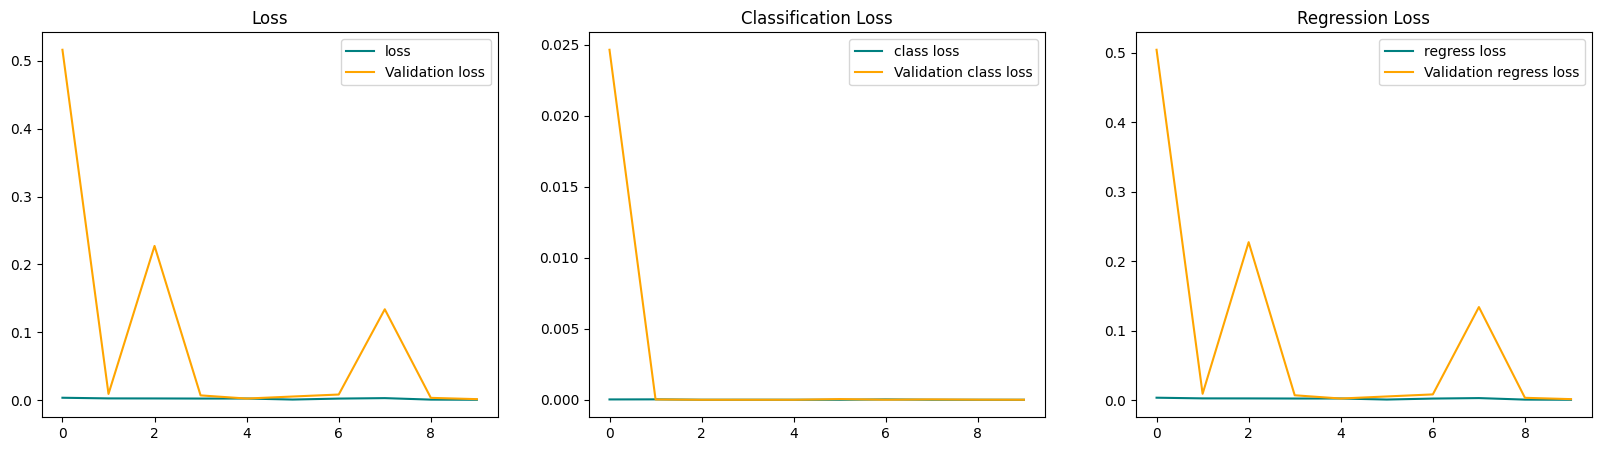

In [81]:
import seaborn as sns

# Set the seaborn style to 'darkgrid' for a modern and clean background
sns.set(style="darkgrid")

# Create a figure and a set of subplots with 3 columns.
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))

# Customize the plot with seaborn's color palette and modern style
colors = sns.color_palette('pastel')  # Use seaborn's pastel color palette

# Plot total loss with a more modern look
ax[0].plot(hist.history['total_loss'], color=colors[0], label='Training Loss', marker='o', linestyle='-')
ax[0].plot(hist.history['val_total_loss'], color=colors[1], label='Validation Loss', marker='s', linestyle='--')
ax[0].set_title('Total Loss Over Epochs', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].legend(frameon=True, shadow=True)

# Plot classification loss with updated style
ax[1].plot(hist.history['class_loss'], color=colors[2], label='Training Classification Loss', marker='o', linestyle='-')
ax[1].plot(hist.history['val_class_loss'], color=colors[3], label='Validation Classification Loss', marker='s', linestyle='--')
ax[1].set_title('Classification Loss Over Epochs', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Classification Loss', fontsize=12)
ax[1].legend(frameon=True, shadow=True)

# Plot regression loss with a modern aesthetic
ax[2].plot(hist.history['regress_loss'], color=colors[4], label='Training Regression Loss', marker='o', linestyle='-')
ax[2].plot(hist.history['val_regress_loss'], color=colors[5], label='Validation Regression Loss', marker='s', linestyle='--')
ax[2].set_title('Regression Loss Over Epochs', fontsize=14, fontweight='bold')
ax[2].set_xlabel('Epochs', fontsize=12)
ax[2].set_ylabel('Regression Loss', fontsize=12)
ax[2].legend(frameon=True, shadow=True)

plt.tight_layout()  # Adjust layout for a clean look
plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Testing Set

In [83]:
# Assuming 'Testing' is a pre-defined TensorFlow dataset for testing,
# 'as_numpy_iterator' method converts it into an iterable of numpy arrays
test_data = Testing.as_numpy_iterator()

# Fetch the next batch of test samples using the iterator's 'next' method
# 'test_sample' contains both the images (test_sample[0]) and their labels (test_sample[1])
test_sample = test_data.next()

# Assuming 'facetracker' is a pre-trained TensorFlow model for face tracking,
# 'predict' method is used to make predictions on the test images.
# The input is the images part of the test_sample, i.e., test_sample[0]
yhat = facetracker.predict(test_sample[0])

# 'yhat' will now contain the predictions made by the model. Depending on the model's
# configuration, this can be the class probabilities, bounding box coordinates, etc.

1/1 [==============================] - 0s 387ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


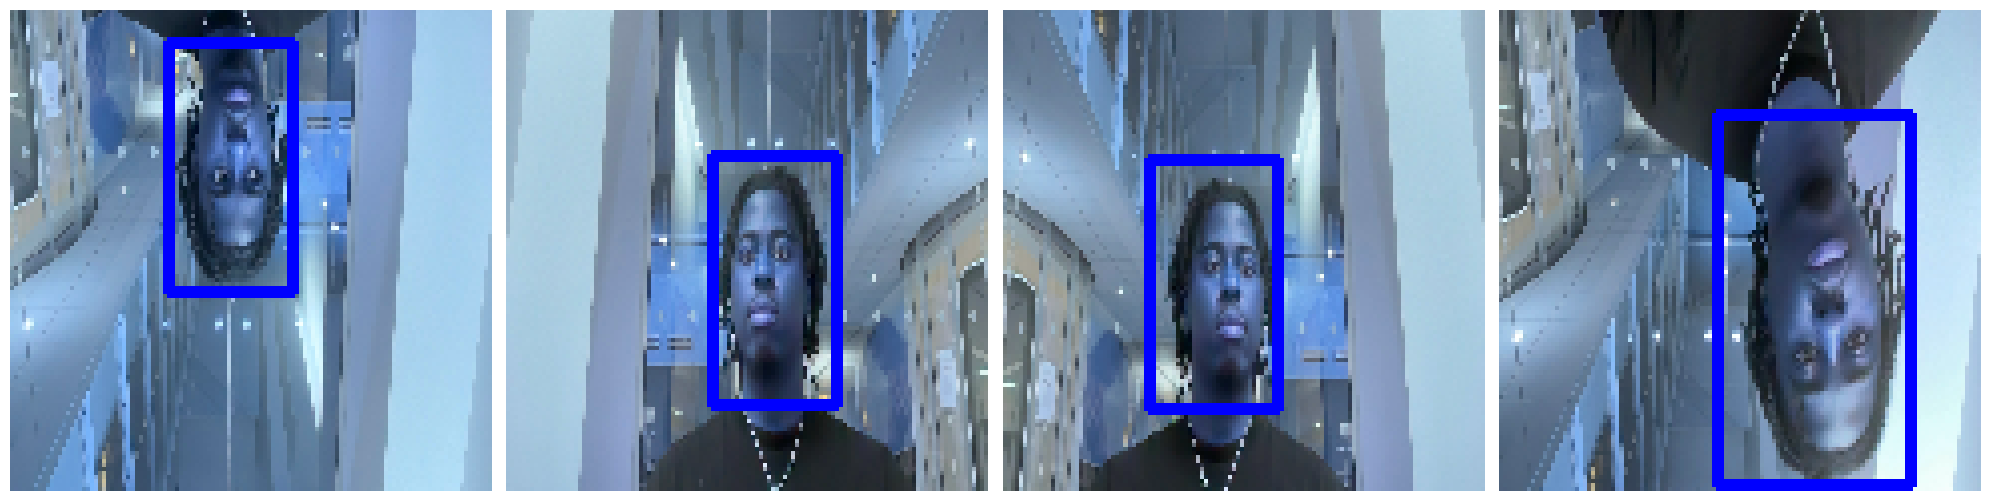

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    # Make a writable copy of the sample image
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    # Only draw rectangle if confidence score is greater than 0.9
    if yhat[0][idx] > 0.95:
        start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
        end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))
        
        cv2.rectangle(sample_image, start_point, end_point, (255, 0, 0), 2)
    
    # Convert BGR to RGB for displaying with matplotlib
    sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    
    # Display the image with rectangles
    ax[idx].imshow(sample_image_rgb)
    ax[idx].axis('off')  # Hide axis

plt.tight_layout()
plt.show()

### 11.2 Save the Model

In [4]:
# Import the necessary function from the TensorFlow Keras library
from tensorflow.keras.models import load_model

# Save the pre-trained model 'facetracker' to the disk.
# The model is saved in HDF5 format with the filename 'facetracker.h5'.
# This includes the model's architecture, weights, and training configuration.
facetracker.save('facetracker.h5')

# Load the model from the disk.
# The 'load_model' function reads the model from the 'facetracker.h5' file,
# reconstructing the model's architecture, and loading its weights and training configuration.
# The loaded model is assigned back to the variable 'facetracker', ready for inference or further training.
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection (THIS IS THE ONLY PIECE OF CODE YOU SHOULD RUN )

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

facetracker = load_model('facetracker.h5')

# Initialize video capture on the first camera
cap = cv2.VideoCapture(0)

# Continuously process frames from the video capture
while cap.isOpened():
    # Read a frame from the video capture
    _, frame = cap.read()

    # Convert the frame from BGR to RGB color space for model compatibility
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Resize the RGB frame to the input size expected by the face tracking model
    resized = tf.image.resize(rgb, (120, 120))

    # Predict face coordinates using the face tracking model
    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]

    # Draw rectangles if the prediction confidence is higher than 0.5
    if yhat[0] > 0.9:
        # Calculate start and end points for the main rectangle around the face
        start_point = tuple(np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int))
        end_point = tuple(np.multiply(sample_coords[2:], [frame.shape[1], frame.shape[0]]).astype(int))

        # Draw the main rectangle around the face
        cv2.rectangle(frame, start_point, end_point, (255, 0, 0), 2)

        # Add the 'face' label text above the main rectangle
        cv2.putText(frame, 'face', tuple(np.add(start_point, [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the processed frame
    cv2.imshow('EyeTrack', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'